In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign project folder path to a variable

path = r'C:\Users\cook family\Desktop\07-2023 Instacart Basket Analysis'

In [3]:
# Import data

df_final_subset = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_subset_sample.pkl'))

In [4]:
# Check output

df_final_subset.head()

,Gender,State,Age,n_dependants,fam_status,income,order_number,loyalty_flag,spending_flag,order_frequency_flag,...,busiest_period_of_day,region,department,Age_group,income_group,dependents_group,customer_profile,customer_income_profile,time_period,day
4,Female,Alabama,31,3,married,40423,5,New customer,Low spender,Non-frequent customer,...,Most orders,South,beverages,Middle Aged Adults,Low Income,Parent,Married older parent,Low income married older parent,Between 8am and 5pm,Wednesday
5,Female,Alabama,31,3,married,40423,6,New customer,Low spender,Non-frequent customer,...,Average orders,South,beverages,Middle Aged Adults,Low Income,Parent,Married older parent,Low income married older parent,Before 8am,Monday
11,Female,Alabama,31,3,married,40423,1,New customer,Low spender,Non-frequent customer,...,Average orders,South,snacks,Middle Aged Adults,Low Income,Parent,Married older parent,Low income married older parent,Between 8am and 5pm,Monday
12,Female,Alabama,31,3,married,40423,2,New customer,Low spender,Non-frequent customer,...,Average orders,South,snacks,Middle Aged Adults,Low Income,Parent,Married older parent,Low income married older parent,Before 8am,Tuesday
17,Female,Alabama,31,3,married,40423,7,New customer,Low spender,Non-frequent customer,...,Most orders,South,snacks,Middle Aged Adults,Low Income,Parent,Married older parent,Low income married older parent,Between 8am and 5pm,Sunday


In [5]:
# Check shape

df_final_subset.shape

(9722678, 27)

## Step 6 Create bar chart

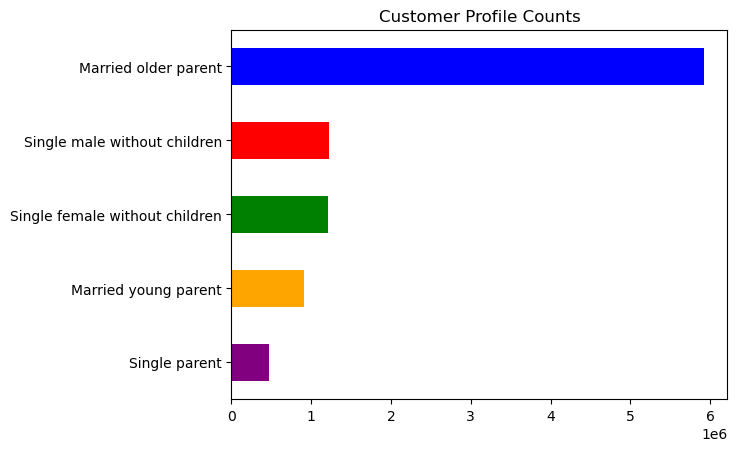

In [6]:
# Create a bar chart from the "customer_profile" column

bar = df_final_subset['customer_profile'].value_counts().sort_values(ascending=True).plot.barh(color = ['purple', 'orange', 'green', 'red', 'blue'], title = 'Customer Profile Counts' )

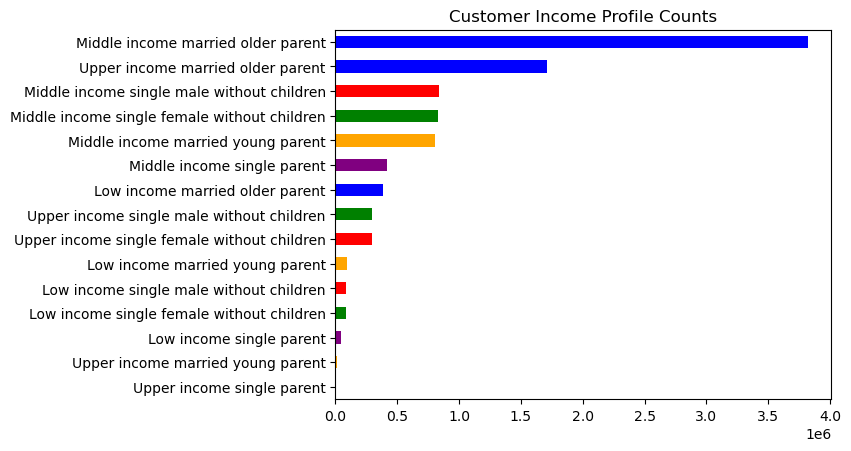

In [7]:
# Create bar chart
bar_cust_inc_prof = df_final_subset['customer_income_profile'].value_counts().sort_values(ascending=True).plot.barh(color = ['purple','orange','purple', 'green','red', 'orange', 'red', 'green', 'blue', 'purple','orange','green','red','blue', 'blue'], title = 'Customer Income Profile Counts' )

In [8]:
# Check frequency 

df_final_subset['customer_profile'].value_counts(dropna=False)

Married older parent              5920461
Single male without children      1218011
Single female without children    1209978
Married young parent               907975
Single parent                      466253
Name: customer_profile, dtype: int64

## Step 7 Aggregate variables for customer- profile usage

In [9]:
# Aggregate customer profile by prices

df_final_subset.groupby('customer_profile').agg({'prices':['min', 'mean', 'max']})

prices                
                                  min      mean   max
customer_profile                                     
Married older parent             0.99  7.791673  25.0
Married young parent             0.99  7.781702  25.0
Single female without children   0.99  7.789107  25.0
Single male without children     0.99  7.789972  25.0
Single parent                    0.99  7.805966  25.0

In [10]:
# Aggregate customer profile by orders

df_final_subset.groupby('customer_profile').agg({'order_number':['min', 'mean', 'max']})

order_number               
                                        min       mean max
customer_profile                                          
Married older parent                      1  17.089664  99
Married young parent                      1  17.076569  99
Single female without children            1  17.411750  99
Single male without children              1  17.118282  99
Single parent                             1  17.294222  99

In [11]:
crosstab = pd.crosstab(df_final_subset['order_number'], df_final_subset['customer_profile'], dropna=False)

In [12]:
crosstab.head()

customer_profile,Married older parent,Married young parent,Single female without children,Single male without children,Single parent
order_number,,,,,
1,379900,58335,76736,78480,29604
2,373672,57524,76539,76564,29427
3,376446,57000,75468,76998,29035
4,331864,50929,67312,68609,25809
5,297866,45437,60318,61310,23078


In [13]:
crosstab.shape

(99, 5)

In [14]:
grouped = df_final_subset.groupby('customer_profile').agg({'order_number':['sum']})

In [15]:
grouped.head()

,order_number
,sum
customer_profile,
Married older parent,101178692
Married young parent,15505098
Single female without children,21067835
Single male without children,20850256
Single parent,8063483


In [16]:
# Aggregate customer income profile by prices

df_final_subset.groupby('customer_income_profile').agg({'prices':['min', 'mean', 'max']})

prices                
                                                min      mean   max
customer_income_profile                                            
Low income married older parent                1.00  6.543623  25.0
Low income married young parent                1.00  6.627176  25.0
Low income single female without children      1.00  6.548489  25.0
Low income single male without children        1.00  6.554849  25.0
Low income single parent                       1.00  6.603981  25.0
Middle income married older parent             0.99  7.844208  25.0
Middle income married young parent             0.99  7.915393  25.0
Middle income single female without children   0.99  7.867340  25.0
Middle income single male without children     0.99  7.865138  25.0
Middle income single parent                    0.99  7.928077  25.0
Upper income married older parent              0.99  7.957707  25.0
Upper income married young parent              0.99  7.661818  25.0
Upper income single female without children    0.99  7.935115  25.0
Upper income single male without children      0.99  7.941216  25.0
Upper income single parent                     0.99  7.844824  25.0

## Step 8 Compare customer profiles by region

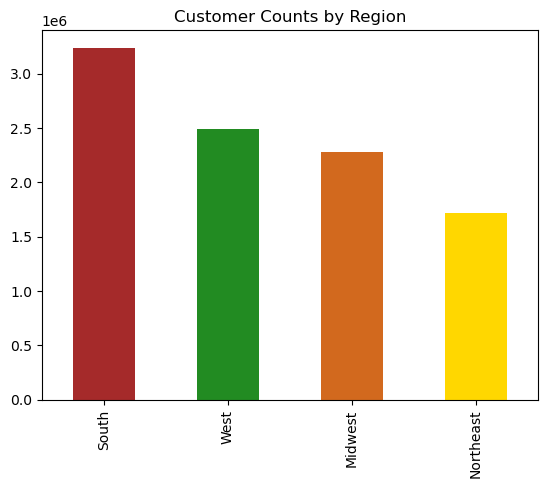

In [17]:
# Create a bar chart from the "region" column

bar_region = df_final_subset['region'].value_counts().plot.bar(title = 'Customer Counts by Region', color = ['brown', 'forestgreen', 'chocolate', 'gold'])

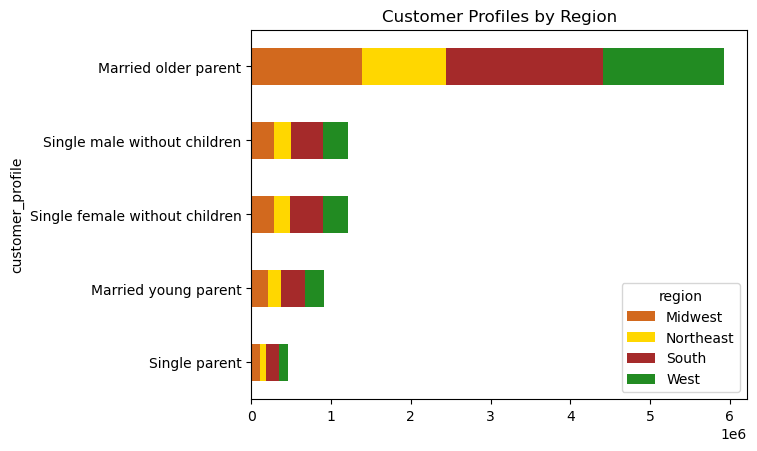

In [18]:
# Group customer profile and regions

cust_prof_region = df_final_subset.groupby(['customer_profile', 'region']).size().unstack()

# Sort

cust_prof_region = cust_prof_region.loc[cust_prof_region.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

cust_prof_region_bar = cust_prof_region.plot.barh(stacked = True, title = 'Customer Profiles by Region', color = ['chocolate','gold','brown', 'forestgreen'])

In [19]:
# Create customer profile and region crosstab

crosstab_profile_region = pd.crosstab(df_final_subset['customer_profile'], df_final_subset['region'], dropna=False)
crosstab_profile_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Married older parent,1384073,1054012,1967260,1515116
Married young parent,213126,157904,302200,234745
Single female without children,284338,207915,411500,306225
Single male without children,286847,217498,398454,315212
Single parent,110266,80672,159367,115948


In [20]:
# Create customer income profile and region crosstab

crosstab_inc_profile_region = pd.crosstab(df_final_subset['customer_income_profile'], df_final_subset['region'], dropna=False)
crosstab_inc_profile_region

region,Midwest,Northeast,South,West
customer_income_profile,,,,
Low income married older parent,89018,70422,131165,98035
Low income married young parent,22039,15785,32222,22054
Low income single female without children,18393,15047,30156,23211
Low income single male without children,20067,16306,28685,21822
Low income single parent,9864,7684,14186,10921
Middle income married older parent,885970,676416,1273876,982499
Middle income married young parent,188458,140479,266449,209671
Middle income single female without children,197966,143084,280212,209407
Middle income single male without children,196710,149569,275235,216704


Across all customer profiles, the region with the highest frequency of orders is the South and the region with the lowest frequency of orders is the Northeast.  

Across all regions, the customer profile with the highest frequency is the Married older parent and Middle income married older parent profile, which unexpectedly has a higher order frequency than the Upper income married older parent profile; and the customer profile with the lowest frequency is the Single parent and the Upper income single parent profile, which surprisingly, has a lower order frequency than the Low income single parent group in all regions.